Module 5, Lab 2 - Regression
============================

In this lab, we continue from where we were in the previous lab. In case
it's been a little while, I will re-load the data and get you up and
running.

Regression is used when you seek to *understand* or *predict* a given
outcome variable in greater depth. One problem with correlation, as we
saw in the previous lab, is that many of our variables overlap. In
regression, we can isolate the unique or non-overlapping relationships
among our variables. This is very powerful, as it allows us to
understand what our variables are doing in a new way.

In this example, we have a dataset, inspired by a dataset published on
kaggle (<https://www.kaggle.com/unsdsn/world-happiness>). In this
dataset, several regions of the world are compared on dimensions such as
their generosity, happiness, GDP, and so forth.

In this lab, we will use a number of Python packages:

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load Data
=========

Next, let's load the data.

In [2]:
#### LOAD DATA ####
dat = pd.read_csv("datasets/regionalhappy.csv")

Inspecting the dataset, we see the column names are a little messy. Further, using a `.` in a column name will lead to problems in Python as the second part of the name is not an attribute of the first. 

In [3]:
dat.columns

Index(['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

We can rename them easily by assigning them to the  `columns` attribute of the data frame:

In [4]:
dat.columns = ["Happiness", "GDP", "Family", "Life.Expect", "Freedom", "Generosity", "Trust.Gov", "Dystopia"]

Let's look at the first few rows of the data:

In [5]:
dat.head()

,Happiness,GDP,Family,Life.Expect,Freedom,Generosity,Trust.Gov,Dystopia
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Much better.

Regression Concepts
===================

Recall that the purpose of regression is to predict one variable. In
this case, let's predict `Happiness`. In regression, this is done by
generating an equation that predicts the outcome from one or more
predictors. The equation looks like this for a single predictor:

$$Y' = b_0 + b_1 x$$

 In this regression equation, we can guess each person's Y score (*Y*′)
by starting with a constant (i.e., intercept, *b*<sub>0</sub>) and
adding to that their score on a predictor variable (*x*<sub>1</sub>),
multiplied by its respective slope (*b*<sub>1</sub>).

We need not only use one predictor:

$$Y' = b_0 + b_1 x + b_2 x + b_3 x + b_4 x \ldots$$

In regression, you can have as many predictors as you want, and each
one you add (assuming it's useful), should improve the accuracy of the
prediction. As you can imagine, this is immensely useful in many data
science applications, as it literally provides the ability to predict
the future.

For example, imagine we wanted to predict `Happiness` from a series of
some of our variables:

$$Happiness = b_0 + b_1 \cdot GDP + b_2 \cdot Family + b_3 \cdot Life\_Expect + b_4 \cdot Freedom + 
b_5 \cdot Generosity$$

In this regression equation, we can guess each person's `Happiness`
score by starting with the constant (i.e., intercept, *b*<sub>0</sub>)
and adding to that their score on each of the other variables (GDP,
Family, Life.Expect, Freedom, Generosity), multiplied by its respective
slope
(*b*<sub>1</sub>, *b*<sub>2</sub>, *b*<sub>3</sub>, *b*<sub>4</sub>, *b*<sub>5</sub>).

In addition to helping to predict an outcome, regression is also useful
for *understanding* the variables. By definition, the slope is the
expected increase in the outcome (e.g., expected gain in happiness) for
every one unit of that predictor. For example, if the slope for `GDP`
was 2.18, then by definition I expect to gain an additional 2.18 units
of happiness for every one unit of GDP. The larger the slope, the more
"potent" the variable. A large slope means you get a *lot* of the
outcome (e.g., a lot of happiness) out for every one unit of the
predictor. Conversely, if the slope were zero, the predictor literally
would not matter; adding more of that predictor would have no impact on
the (prediction of the) outcome. So, the slope can be though of as the
importance of that variable for your outcome.

In a regression analysis, all that is needed is the set of *b*s.

Let's try this with a basic regression with one predictor. Let's predict
`Happiness` from `GDP`.

A Simple Regression
===================

There are many Python packages for computing linear regression models in Python. In this case we will use the `OLS` (ordinary least squares) function from the Statsmodels package. `OLS`has two arguments, the vector for the response or dependent variable, and an array containing the one or more predictor or independent variables. Notice that in order to get an intercept term ($b_0$) the `add_constant` method must be used to add a constant column to the predictor array. A `summary` method displays a number of statistics from a `response` object.

In [6]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(dat.GDP, prepend = False)

lm_mod = sm.OLS(dat.Happiness, predictors)
res = lm_mod.fit()
print(res.summary())


C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.11e-37
Time:                        11:07:29   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.0

The model coefficients are displayed in this summary. The intercept is shown as `const`. Thus, our regression equation is as follows:

> Happiness' = 3.2 + 2.18(GDP).

That is, we can take anyone's `GDP` score and plug it into this equation
to predict their happiness. To get a sense as to what a "high" happiness
scores is, let's inspect its distribution:

Range of Happiness = { 2.6930000780000003 7.537000179}


Text(0.5,0,'Happiness')

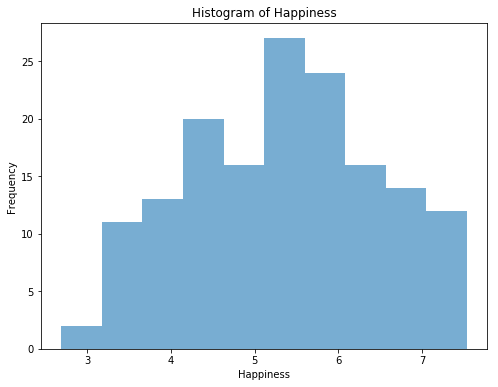

In [7]:
print('Range of Happiness = { ' + str(min(dat.Happiness)) + ' ' + str(max(dat.Happiness)) + '}')

ax = plt.figure(figsize=(8, 6)).gca() # define axis
dat.Happiness.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of Happiness')
plt.xlabel('Happiness')

![](Mod3_Lab2_-_Regression_files/figure-markdown_strict/unnamed-chunk-8-1.png)
Happiness scores tend to range from ~ 2-8.

Let's look at the distribution of `GDP` scores:

Text(0.5,0,'GDP')

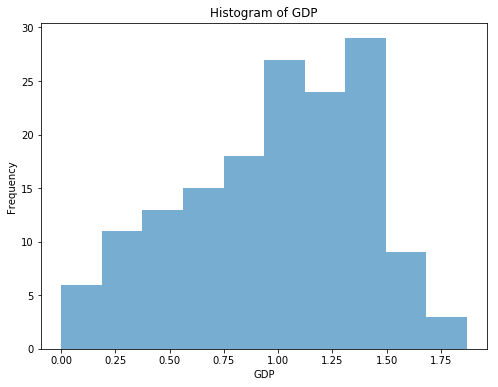

In [8]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
dat.GDP.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of GDP')
plt.xlabel('GDP')

![](Mod3_Lab2_-_Regression_files/figure-markdown_strict/unnamed-chunk-9-1.png)

GDP scores tend to range from 0-2 on this scale.

What if I had a relatively low `GDP` score of say, .5? My predicted
Happiness score would be ...

> Happiness' = 3.2 + 2.18 \* 0.5

Try it yourself. What do you get as the predicted loneliness score?

> Loneliness' = 4.29.

Side note: there is an easy way to get R to do this for you. You simply
use `predict()`, and input the name of your model and a `data.frame()`
giving scores on the predictors:

In [9]:
## Create a new data frame with the predictor value and the constant
new_predict = pd.DataFrame({'GDP':[0.5], 'const':[1.0]})
## Make prediction with new values
res.predict(new_predict)

0    4.295305
dtype: float64

This is handy. We can also give it several GDP scores (0.5, 0.9, 1.7). In this case we can automate adding the constant column with the `add_connstant` method. 

In [10]:
## Create a new data frame with the predictor value and the constant
new_predict = pd.DataFrame({'GDP':[0.5, 0.9, 1.0]})
new_predict = sm.add_constant(new_predict, prepend = False)
## Make prediction with new values
res.predict(new_predict)

C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


0    4.295305
1    5.168979
2    5.387398
dtype: float64

This tool is often used in the real world when you have trained a model
using old data and want to then use it to make guesses for new data.
It's easy to save or download a data frame with information on many new
people and place it into `predict()`. Once the model is trained, you now
have a valuable tool for making predictors for any new person for whom
you have data.

We can also easily visualize this relationship. Because it's simply an
intercept and slope, the predictors form a straight line. The Seaborn `regplot` function computes a regression line with confidence intervals and plots the line with a scatter plot of the data. 

Text(0.5,1,'Happiness vs. GDP with linear regression line')

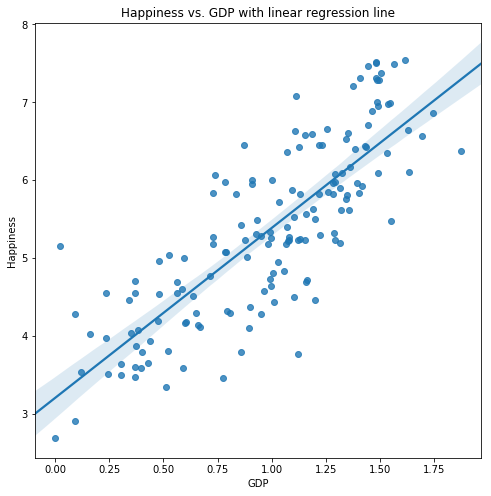

In [11]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x="GDP", y="Happiness", data=dat, ax = ax)
plt.title('Happiness vs. GDP with linear regression line')

![](Mod3_Lab2_-_Regression_files/figure-markdown_strict/unnamed-chunk-12-1.png)

This represents the predictions we generated earlier (e.g., for a GDP of
0.5, the line is at height of 0.5). The grey band represents a 95% CI
around the line. This represents the uncertainty in the steepness of our
slope. We are 95% confident that the "true" slope in the population is
somewhere in that grey band (you can imagine the blue line swiveling a
bit within that grey band). We can easily see the relationship is
"significant" (i.e., not zero, not flat) since the most shallow line we
could fit into that grey band is still going upward. In other words, we
are confident that the slope *is* going upwards (i.e., is not zero). If
we had a null hypothesis that the population slope (often symbolized
*β*) was zero (e.g., *H*<sub>0</sub> : *β* = 0), we could reject that.
This is more informative than simply giving us a *p*-value for the
slope; in this case, we know the slope is not zero *and* that it is
still pretty steep, even at is most shallow plausible value. Of course,
we can get a *p*-value for that slope and more, which we will see in
just a moment.

Inspecting the Regression
=========================

We should check our regression in more detail, see if it satisfies
assumptions, and see if it's a good fit to the data. To get information about your regression model, we simply ask for the
`summary()` of `mod`. To remind you of the results you already saw, the `summary` method is applied to the results of the model `res`. 

In [12]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.11e-37
Time:                        11:07:31   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.0

First, to be clear, there are *two* parameters in the regression model:
the intercept (shown as `const`) and the slope coefficient (shown as `GDP`). Each exists in the population and we are
estimating them in our sample.

This information is found in the middle of the table, where it says 'coef'.
There are two rows, one for the intercept and one for the slope. We see.
For our data, we estimate the intercept is 3.2032. However, this is
just an estimate of the "real intercept" in the population. There is a
standard error, *t*-test, and *p*-value (in R, called `Pr(>|t|)`) shown.
As we see, the intercept is significant, meaning that we are confident
it is "not zero." Of course, we don't really care about the intercept,
but the information is there.

More interesting is the slope for `GDP`. We see that the slope is
estimated at 2.1842. Again, that is just an estimate of the "real"
slope in the population. However, we see there is a *t*-test and
*p*-value and again, we see it is significant. (Same information given
to us by the 95% CI "grey band" in the graph above). This *is* useful
information. This tells you that you can be confident that the slope is
"not zero"...in other words, `GDP` is 'predicting' `Happiness` The slope
can also be interpreted directly. For each unit of GDP, we expect
Happiness to change by 2.1842 units.

You can see that each of the coefficients have a confidence interval. These values represent 95% CIs of the probabilities of the coefficient from '2.5% to 97.5%' or a range of 95%. Another measure of the model coefficients is the standard errors of the coefficients. Finally, the t-test results in the form of t-statistic and the p-value show the significant test results of the model coefficients. 

Now, we are predicting each region's happiness. How accurate are those
predictions? To answer that, we need to discuss residuals.

Residuals are the difference between the actual value and the predicted value. One powerful method for understanding residuals is to make a scatter plot with the residual values on the vertical axis and the predicted values or *Score* on the horizontal axis. This type of display is known as a *residual plot*. The code in the cell below computes predicted or score values, computes residuals and creates the residual plot:

C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'Predicted values')

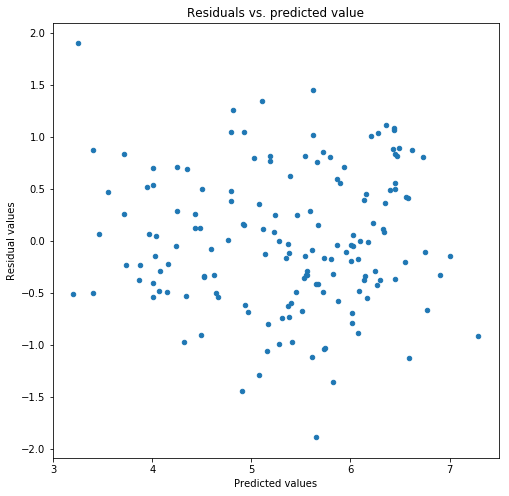

In [13]:
## Create a new data frame with the predictor value and the constant
new_predict = dat.GDP
new_predict = sm.add_constant(new_predict, prepend = False)
## Make prediction with new values
new_predict['Score'] = res.predict(new_predict)
## Compute the residuals 
new_predict['Residuals'] = dat.Happiness - new_predict.Score

ax = plt.figure(figsize=(8, 8)).gca() # define axis
new_predict.plot.scatter(x='Score',y='Residuals', ax = ax)
plt.title('Residuals vs. predicted value')
plt.ylabel("Residual values")
plt.xlabel('Predicted values')

There are two points to notice about the residual plot. First, the residual value are generally in a small range and centered on zero. Second, there does not appear to be any particular change in the dispersion (distribution) of the residuals as the predicted score changes. These observations indicate that the model is a fairly good predictor of Happiness. 

However, we can compute the "residual standard error" which is basically
the "average residual." Some books call this the "standard error of the
estimate." It is essentially the same idea as the standard deviation:
assessing the average degree to which points vary *aroudn the line* (as
opposed to varying around the mean, in standard deviation). In fact, it
uses the same equation as the standard deviation, but modified so scores
vary around the predicted value (y' ... the line) rather than the mean.
Also, we use "n-2" on the bottom for reasons I won't get into:

$$ RSE = \sqrt{\frac{\sum \left ( y-y' \right )^{2}}{n-2}} $$

We see in our our output, "Residual standard error: 0.6617", meaning our
`Happiness` predictions are "off" (on average) by 0.66 points. Given
that the scale is basically 2-7 (ish), this seems pretty good. Of
course, we are *only* using `GDP` to predict scores right now. We could
add other predictors and attempt to make this value smaller (i.e.,
become more accurate in our predictions).

Let's continue exploring our summary output. Residuals are important.
More information about our residuals can be seen up top: the smallest
residual, 1Q (the 25th percentile), the median (the 50th percentile), 3Q
(the 75th percentile), and max. This will come in much handier later.
The median residual is close to zero...that is very important because it
means we are not systematically over-predicting or under-predicting
(phew!). Also importantly, one assumption of a *valid* regression model
is that the regressions are *normally distributed*. Of course, in a
normal distribution, the data are symmetrical, so the lower values (1Q)
should mirror the top values (3Q). We could also simply histogram them:

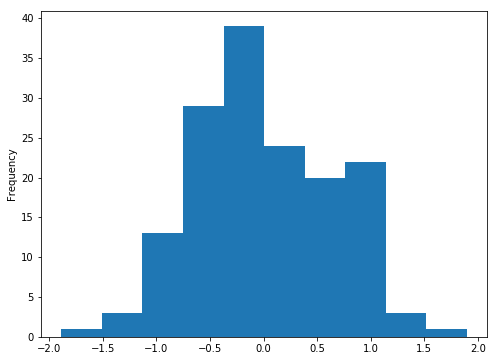

In [14]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
new_predict.Residuals.plot.hist(ax = ax)

These residuals are beautifully Normally distributed. This is a good
sign for our model. This means that we tend to under-predict (negative
values) just as much as we over-predict (positive values). This looks
like a healthy and valid regression model.

Referring back to the table of model evaluation statistics, we see that the "R squared" is .66. I won't go into
the math behind that, but it essentially represents the proportion of
the variance in the outcome (`Happiness`) that is explained by the
predictor(s). the *R*<sup>2</sup> is, basically, the opposite
of the residuals. The residuals represent *unexplained* variation in the
happiness (Y) scores. That is, one region's happiness score may 7, yet
we predict 6 (a residual of -1). This represents some portion of the
score we have not yet explained. On the other hand, the *R*<sup>2</sup>
represents the proportion of variation in `Happiness` that **is
explained.** The better our model, the higher the *R*<sup>2</sup> and
the smaller the residuals. If we could make our residuals zero (i.e.,
perfectly guess every score), our *R*<sup>2</sup> would be 100% (1.00). In other words, we have explained 66% of all the variance
in `Happiness` with just `GDP`. That further reinforces our conclusion
that GDP is a very strong predictor of happiness.  

Related to the
Multiple R squared is a bit more information:
`F-statistic: 297 on 1 and 153 DF,  p-value: < 1.11e-37` ... this is
simply a significance test for the *R*<sup>2</sup> value. We see here
that our model *is* explaining significant variation in happiness. On
level, this is redundant to the test of significance for the slope, but
it because very helpful when there are multiple predictors as a quick
snapshot of the significance of the model. 

I bring this up only because I think it's useful to understand what
these numbers mean. When our goal is *understanding* our variables, then
this information is very important. We are saying we can understand 66%
of what there is to know about happiness with GDP alone.

Multiple Regression
===================

We can improve our predictions by adding more predictors. There are
three reasons to do this.

1.  Our model predicts better given more information to predict with
2.  GDP may be caused by (and therefore serve as a proxy for) other
    variables that are more directly relevant
3.  GDP probably doesn't make people happy directly; it is likely
    causing other things like health care that are more directly relevant

Reasons 2 and 3 are very similar, but they differ in an important way.
Reason 2 suggests that something may be driving *both* GDP *and*
happiness. We discussed this possibility in the labs for association /
causal claims. In that case, GDP is acting as a proxy for whatever that
prior cause was...leading us to possibly misunderstand the role of GDP.
We must statistically control for any prior causes if we want a good
view of what effect GDP has on happiness (and even then, we can't know
whether GDP is the cause or the effect).

Reason 3, on the other hand, suggests that GDP may do things that, in
turn, help happiness. For example, GDP may lead to better health, and
that may aid happiness. In this case, we can still still control for
those variables. Doing so will give "credit" for that relationship to
the more proximal variable (i.e., it will appear that health, not GDP
predicts happiness). In such a case, we should try to remember that GDP
may still be ultimately responsible.

Note that there is no way to tell the difference, statistically between
reason 2 and 3. Thus, the data analysis needs subject matter expertise
to draw good conclusions for observational (i.e., correlation /
regression based) data.

#### Controlling Prior Causes

Reason 2 suggests that GDP may be caused by other things and that *those
things*, not GDP are causing happiness. In such a case, failure to
statistically adjust or control for them makes our regression is
misleading, attributing to GDP what should rightly be attributed to
those prior causes. For example, imagine that GDP was caused, in part,
by freedom. In that case, we can't rightly examine the role of GDP
without first *controlling* for freedom. Failure to do so will
misrepresent what GDP is doing, likely inflating its importance.

Importantly, however, you can easily control for a third (or fourth,
fifth, or any number) of variables. To do so, you simply add them as
other predictors in the regression. One very helpful feature of
regression is that every variable is examined *controlling for / holding
constant all the others*, so regression lets you see the *unique*
influence of each predictor. In other words, it lets you see what the
slope for each predictor would be, had participants had the same score
on all the other predictors. **Important: this only works if you thought
ahead and measured every variable you need to control for**. This is one
reason why I advocate for collecting data and not simply relying on
existing data repositories. You may very well need to control for a
variable that you don't have! However, if we think ahead, we can attempt
to measure any variable we might want to control for.

Let's try it, controlling for freedom:

In [15]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(dat[['GDP','Freedom']], prepend = False)

lm_mod_2 = sm.OLS(dat.Happiness, predictors)
res_2 = lm_mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           9.64e-46
Time:                        11:07:32   Log-Likelihood:                -132.85
No. Observations:                 155   AIC:                             271.7
Df Residuals:                     152   BIC:                             280.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            1.8736      0.119     15.788      0.0

C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


First, our residual standard error (average mis-prediction) has decreased
some and our *R*<sup>2</sup> has increased. That tells us we have
"added" to our ability to predict happiness. 

As a side note, you can
test whether that increase is significant with `anova_lm(mod, mod2)` from the statsmodels.stats.anova package:

****
**Note:** Depending on which version of the package you are using you may see some RuntimeWarnings which you can ignore.
****

In [16]:
anova_lm(res, res_2, typ = 1)

C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,153.0,66.983338,0.0,NaN,NaN,NaN
1,152.0,50.385944,1.0,16.597394,50.069597,5.094782e-11


This runs an *F* test with a significant result (*p*-value is `Pr(>F)`,
i.e., less than .05). This tells us that adding health/life expectancy
*significantly* (i.e., greater than chance) improved our prediction of
happiness. 

The *R*<sup>2</sup> value went up by 0.08 (i.e., 8.6%, mod:
0.66, mod2: 0.74) so we have explained an additional 8.6% of
happiness.

Our new regression equation is:

> Happiness' = 2.55 + 1.87(GDP) + 2.36(Freedom).

The real action is in the slopes of the model, however. First, we can
see that the slope for GDP is still significant as is now the slope for
freedom (*p* values in far right column of the summary output). That
tells us we can be confident that, to some degree, they each predict
happiness *with the other controlled*. In other words, it is not the
case that the role of GDP is actually all due to freedom or vice versa.
Each has some *unique* or independent relationship with happiness.

However, we also do see that the slope for GDP went down. It was
originally 2.184 and is now 1.874, a difference of 0.31. If
we take that as a fraction of the original slope,
$\frac{0.31}{2.184} = .14$, we see that our slope has gone down
by 14%. In other words, 14% of what we had previously attributed to GDP
we can now actually attribute to freedom. This shows just how important
it is to control for things: we were seriously overestimating the
importance of GDP.

This illustrates the importance of having the correct statistical
controls in your study. We could easily imagine relationships that could
be reduced to zero when the necessary variables are controlled. If we
want to measure, as best we can, the impact of a predictor on the
outcome it is a **requirement** that we control for any possible hidden
drivers of your predictor that might *actually* be responsible for your
outcome. Thus, in this case, we might think of any *other* variables
that might lead to *both* higher GDP and greater national happiness.
Freedom is one, but we cannot draw a sound conclusions without seriously
thinking through and controlling for any others.

This brings up a *central* reason why organizations should conduct
research and not merely rely on existing data. In existing data sets,
you are tempted to draw conclusions on the basis of the data you have,
not the data you don't have. Yet, we see here, the data you don't have
could be necessary as a statistical control. Without that, how can we
really know that it is GDP, and not some other prior cause of GDP that
is driving up happiness? It is very important to seriously consider what
variables might be causing *both* your predictor and your outcome; if
these are not statistically controlled, then false conclusions are
possible.

#### Standardized Slopes

At this point, you might also be interested in which variable is the
stronger predictor. Unfortunately, the slopes are entirely dependent on
the units measured.

However, we can standardize them, putting them on the same scale so they
can be directly compared. This is done by taking each slope and
multiplying it by the ratio of the standard deviations:

$$b = \frac{SD\_x}{SD\_y}$$

Functionally, this changes nothing. **It only changes the units.** For
example, the slope for freedom was originally 2.3557. This means that
happiness is expected to increase 2.3557 *units* per *unit* of freedom.
If we multiply by standard deviations, however, the units become
standard deviations:

In [17]:
print('Adjusted coefficient for GDP = ' + str(res_2.params[0] * np.std(dat.GDP)/np.std(dat.Happiness)))
print('Adjusted coefficient for Freedom = ' + str(res_2.params[1] * np.std(dat.Freedom)/np.std(dat.Happiness)))

Adjusted coefficient for GDP = 0.6969353395951947
Adjusted coefficient for Freedom = 0.31235935563988804


We immediately see that GDP has a much larger estimated effect than
freedom. At least in our sample data, the wealth of a region is more
important for its happiness than its freedom (the difference between
slopes can also be tested for significance, ideally with something
called bootstrapping, but we will not explore that now).

We now have the tools we need to begin to understand our data. Using
multiple regression, I can examine the relationships between any
variables, controlling for any number of others. If I want to be able to
assess what variables are the most important predictors, standardized
slopes offer an easy solution (they are often comparable to correlations
as well, providing a rough mental guide for interpreting them).

#### Assumptions of Regression

There are a few important assumptions and caveats you should know. Seven
key assumptions are:

Our assumptions are:

1.  Linear model is appropriate
2.  Homoskedasticity
3.  Observations are independent
4.  Our residuals must be normally distributed
5.  Our residuals should have a mean of zero
6.  The model is correctly specified
7.  Multicollinearity is not a problem

**Assumption 1**, is a linear model appropriate? Well, do we have good
reason to suspect a non-linear relationship between GDP and happiness?
In this case, I have no theoretical or evidence based reason to think
otherwise. However, obviously, a linear model (i.e., a "straight line"
regression) would not make sense if the data were not a straight line.

Note that there are a few cases where this *IS* violated.

1.  If your y-variable has only two levels (e.g., "purchased product,
    did not purchase product"), then a linear model is not appropriate
    (we use something called *logistic regression*). There are similar
    extensions for variables with several categories.

2.  Another common case is if your y-variable is a "count" of something
    (e.g., how many pairs of shoes do people have?). In that case,
    negative numbers are impossible, and any slopes will need to "bend"
    as they approach the x-axis so they don't cross it. There are
    "count" models for that. We won't learn them, but you could if you
    needed to.

3.  Math allows for any shape of line; for similar reasons, we can make
    a regression line into any shape (not covered here). A word of
    caution: the more complex a model, the more likely it is to be a
    "false positive" finding. Beware making models too complex on the
    basis of your data. Usually, simpler models are more correct unless
    you have good reason to make it non-linear.

**Assumption 2**, homoskedasicity. Briefly, this means that the
residuals are the same all the way up and down the line. This is
violated if residuals are really small at one end (line fits great) and
really big at the other (line fits awful). Without going into detail,
the *p*-values for the slopes use the residuals in the equations. If the
residuals vary systematically throughout the graph, that's a problem.
Look at the residuals plot above, however, and we see they seem roughly
uniform up and down the line. We're fine.

**Assumption 3**, our observations are independent. That is, our data
points didn't influence each other. This would be a problem, for
example, if our data included the same regions over a multi-year period.
The 2016 happiness score and the 2017 happiness score for a region will
be similar because it's the same region. This influences the residuals,
and in turn, the *p*-values in a problematic way. *Violating this
assumption tends to make your findings **more** significant* so it's
good to account for any kind of "nesting" substructure.

Having multiple data points on the same observation is one common way
you can violate this assumption, but other kinds of nesting might as
well. For example, data may be nested within stores in a way we might
want to account for. In such a case, a *linear mixed model* is often
better and simply extends the regression somewhat to account for the
nesting.

**Assumption 4 + 5,** our residuals must be normally distributed and
with a mean of zero. We can briefly check this with a histogram:

C:\Users\JMARTINEZ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


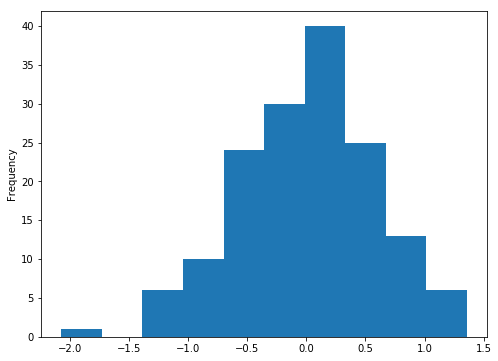

In [18]:
## Create a new data frame with the predictor values and the constant
new_predict = dat[['GDP','Freedom']]
new_predict = sm.add_constant(new_predict, prepend = False)
## Make prediction with new values and 2 predictor model
new_predict['Score'] = res_2.predict(new_predict)
## Compute the residuals 
new_predict['Residuals'] = dat.Happiness - new_predict.Score

## Plot the histogram of the residuals
ax = plt.figure(figsize=(8, 6)).gca() # define axis
new_predict.Residuals.plot.hist(ax = ax)

![](Mod3_Lab2_-_Regression_files/figure-markdown_strict/unnamed-chunk-23-1.png)

It's roughly normal. We can check the mean:

In [19]:
new_predict['Residuals'].mean()

-9.569406199349736e-16

It has some skew, but it's not terrible.

**The normality of residuals tends to be violated if the outcome
(y-variable) is skewed**. There are other kinds of regressions for
highly skewed outcome variables; there are also transformations that can
be done to the outcome variable to make it more normal. We explored such
transformations in the previous lab, but such a transformation is not
needed here.

**Assumption 6** states that we have included all the causes of our
outcome in the model. Although impossible in practice, we can reasonably
think through what variables we need to control for when running our
regression.

Now you see something important: to do regression analysis well, you
need to understand the subject area. You need to know what to control
for *before* the data are collected.

**Assumption 7** states that multicollinearity is not a problem.

Briefly, when you control for a variable (e.g., looking at GDP and
happiness, controlling for freedom), you can cause a problem called
multicollinearity.

Consider the following situation: you want to assess the role of annual
salary on employee engagement, controlling for monthly salary.
Hopefully, you think that's a crazy idea because the predictor and
control variables are redundant. It's completely nonsensical. What would
it even mean to examine the role of your annual salary, holding your
monthly salary constant? There would be "nothing left" to annual salary
after we statistically hold monthly salary constant.

Similarly, there are a lot of highly overlapping variables in research
contexts. Imagine a survey asking customers how 'angry' they are and how
'upset' they are after receiving poor service. Angry people are upset.
Upset people feel angry. They're very similar. Conceptually, if you
tried to examine anger with 'upset' controlled, you are going to remove
a lot of the meaning in the anger variable, and vice versa. Will there
be enough "left" to make a reasonable regression?

When predictors overlap (correlate) too much among each other, they
become useless. In general, it's good to avoid having high correlations
among predictors, *r* = .80, *r* = .90, etc.). The slopes can act oddly
in such cases, even reversing directions.